In [1]:
import pandas as pd
import requests
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns


## The NIPH data files.
https://github.com/folkehelseinstituttet/surveillance_data

In [ ]:

# URL of the data files

#url="https://github.com/folkehelseinstituttet/surveillance_data/raw/master/covid19/data_covid19_death_by_time_2022-03-18.xlsx"
url_msis_sexage="https://github.com/folkehelseinstituttet/surveillance_data/raw/master/covid19/data_covid19_msis_by_time_sex_age_latest.csv"
url_hosp="https://github.com/folkehelseinstituttet/surveillance_data/raw/master/covid19/data_covid19_hospital_by_time_latest.csv"
url_lab="https://github.com/folkehelseinstituttet/surveillance_data/raw/master/covid19/data_covid19_lab_by_time_latest.csv"
url_death="https://github.com/folkehelseinstituttet/surveillance_data/raw/master/covid19/data_covid19_death_by_time_latest.csv"
url_demo="https://github.com/folkehelseinstituttet/surveillance_data/raw/master/covid19/data_covid19_demographics_latest.csv"
url_msis_location="https://github.com/folkehelseinstituttet/surveillance_data/raw/master/covid19/data_covid19_msis_by_location_latest.csv"
url_vac="https://github.com/folkehelseinstituttet/surveillance_data/raw/master/covid19/data_covid19_sysvak_by_time_location_latest.csv"
#url = "https://github.com/folkehelseinstituttet/surveillance_data/blob/67a2cb6ba56c10e78a296dfde7a9ceff185ae526/covid19/data_covid19_death_by_time_2022-03-18.xlsx"


In [284]:

# Read the cvs file from the URL
msis_sexage = pd.read_csv(url_msis_sexage)
msis_location = pd.read_csv(url_msis_location)

hosp = pd.read_csv(url_hosp)
lab=pd.read_csv(url_lab)
demo=pd.read_csv(url_demo)
death=pd.read_csv(url_death)
vac=pd.read_csv(url_vac)
# Change the dates to date_time
lab['date']=pd.to_datetime(lab.date)
death['date']=pd.to_datetime(death.date)
msis_location['date']=pd.to_datetime(msis_location.date)
msis_sexage['date']=pd.to_datetime(msis_sexage.date)
demo['date']=pd.to_datetime(demo.date)
hosp['date']=pd.to_datetime(hosp.date)
vac['date']=pd.to_datetime(vac.date)

Let us check the frequency of the data. We notice that all are on daily basis, apart from _death_ and _msis_sexage_ that are weekly numbers. 

In [285]:

print('lab dT: ' + str(lab.date[1]-lab.date[0]))
print('death dT: ' + str(death.date[1]-death.date[0]))
print('msis_sexage dT: ' + str((msis_sexage.date.unique()[1]-msis_sexage.date.unique()[0]).astype('timedelta64[D]')))
print('demo dT: ' + str((demo.date[1]-demo.date[0])))
print('hosp dT: ' + str(hosp.date[1]-hosp.date[0]))
print('vac dT: ' + str(vac.date[1]-vac.date[0]))


lab dT: 1 days 00:00:00
death dT: 7 days 00:00:00
msis_sexage dT: 7 days
demo dT: 0 days 00:00:00
hosp dT: 1 days 00:00:00
vac dT: 1 days 00:00:00


## Vaccination

set the index to date for easier plotting.

In [286]:
vac=vac[['date', 'n_dose_1',
       'n_dose_2', 'n_dose_3', 'n_dose_4', 'cum_n_dose_1', 'cum_n_dose_2',
       'cum_n_dose_3', 'cum_n_dose_4', 'cum_pr100_dose_1', 'cum_pr100_dose_2',
       'cum_pr100_dose_3', 'cum_pr100_dose_4', 'pop', 'location_name']].set_index('date')
vac

,n_dose_1,n_dose_2,n_dose_3,n_dose_4,cum_n_dose_1,cum_n_dose_2,cum_n_dose_3,cum_n_dose_4,cum_pr100_dose_1,cum_pr100_dose_2,cum_pr100_dose_3,cum_pr100_dose_4,pop,location_name
date,,,,,,,,,,,,,,
2020-12-02,0,0,0,NaN,0,0,0,NaN,0.0,0.0,0.0,NaN,693494,Oslo
2020-12-03,0,0,0,NaN,0,0,0,NaN,0.0,0.0,0.0,NaN,693494,Oslo
2020-12-04,0,0,0,NaN,0,0,0,NaN,0.0,0.0,0.0,NaN,693494,Oslo
2020-12-05,0,0,0,NaN,0,0,0,NaN,0.0,0.0,0.0,NaN,693494,Oslo
2020-12-06,0,0,0,NaN,0,0,0,NaN,0.0,0.0,0.0,NaN,693494,Oslo
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2022-11-09,43,59,419,5799.0,4346936,4054643,3005480,729702.0,80.1,74.7,55.4,13.5,5425270,Norge
2022-11-10,42,58,399,5385.0,4346978,4054701,3005879,735087.0,80.1,74.7,55.4,13.5,5425270,Norge
2022-11-11,16,25,211,2596.0,4346994,4054726,3006090,737683.0,80.1,74.7,55.4,13.6,5425270,Norge


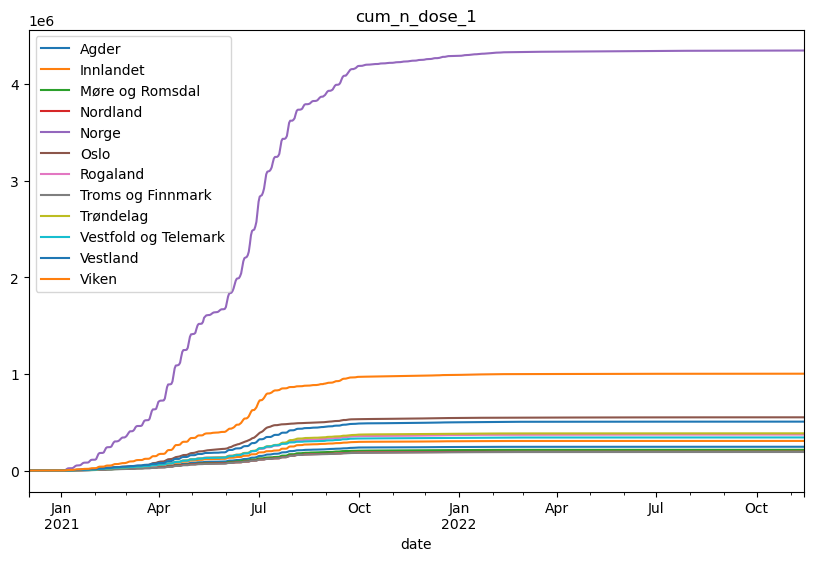

In [447]:
variable='cum_n_dose_1'
fig,axs=plt.subplots(1,1,figsize=(10,6))

vac.groupby('location_name')[variable].plot(legend=True,title=variable, ax=axs);

Is this the right way to present the data?

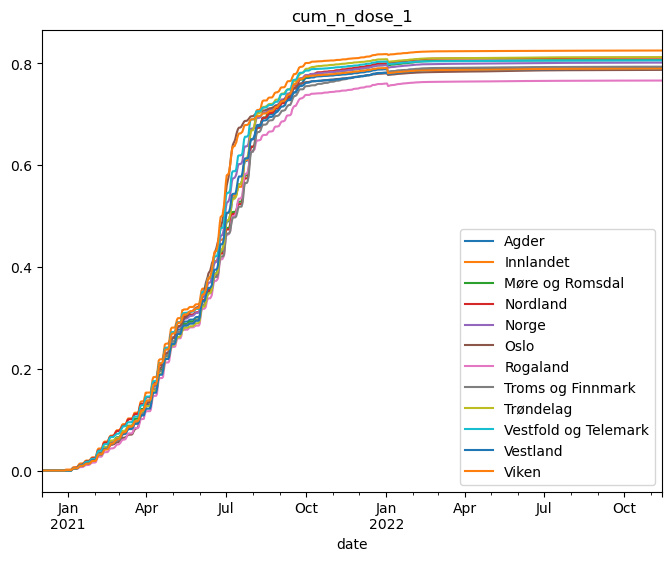

In [448]:
fig,axs=plt.subplots(1,1,figsize=(8,6))
tmp=vac.copy()
tmp['norm']=tmp[variable]/tmp['pop']
tmp.groupby('location_name')['norm'].plot(legend=True,title=variable,ax=axs);

### Extract some data
We take the national numbers, from the vaccination data and drop most of the columns. 
From the lab data we keep only the date and the negative and positive results. 

In [293]:
tmp=vac.where(vac['location_name']=='Norge').dropna().copy()

#tmp.drop(columns=[tmp.columns[i] for i in range(11)], inplace=True)
lab_hosp=lab[['date','n_neg','n_pos']].set_index('date')
lab_hosp=lab_hosp.join(tmp)
tmp=hosp[['date','n_icu','n_hospital_main_cause']].set_index('date')
lab_hosp=lab_hosp.join(tmp)
lab_hosp=lab_hosp.drop(columns=['location_name'])

lab_hosp

,n_neg,n_pos,n_dose_1,n_dose_2,n_dose_3,n_dose_4,cum_n_dose_1,cum_n_dose_2,cum_n_dose_3,cum_n_dose_4,cum_pr100_dose_1,cum_pr100_dose_2,cum_pr100_dose_3,cum_pr100_dose_4,pop,n_icu,n_hospital_main_cause
date,,,,,,,,,,,,,,,,,
2020-04-01,3736,198,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4,27
2020-04-02,3361,198,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4,37
2020-04-03,3394,164,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5,21
2020-04-04,1301,88,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3,27
2020-04-05,1048,72,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4,14
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2022-11-09,978,150,43.0,59.0,419.0,5799.0,4346936.0,4054643.0,3005480.0,729702.0,80.1,74.7,55.4,13.5,5425270.0,0,15
2022-11-10,859,118,42.0,58.0,399.0,5385.0,4346978.0,4054701.0,3005879.0,735087.0,80.1,74.7,55.4,13.5,5425270.0,1,10
2022-11-11,589,96,16.0,25.0,211.0,2596.0,4346994.0,4054726.0,3006090.0,737683.0,80.1,74.7,55.4,13.6,5425270.0,1,1


/var/folders/mt/6thqwmbj5lvfz_9z7jnfcxt80000gn/T/ipykernel_16098/2266988357.py:10: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  death.groupby('date').sum().n.plot(marker='o',ax=ax2)


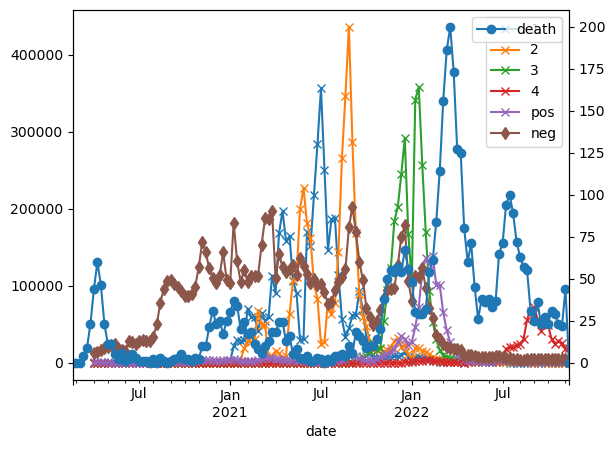

In [294]:
fig, ax1 = plt.subplots()
lab_hosp.resample('W').sum().n_dose_1.plot(marker='x',ax=ax1)
lab_hosp.resample('W').sum().n_dose_2.plot(marker='x',ax=ax1)
lab_hosp.resample('W').sum().n_dose_3.plot(marker='x',ax=ax1)
lab_hosp.resample('W').sum().n_dose_4.plot(marker='x',ax=ax1)
lab_hosp.resample('W').sum().n_pos.plot(marker='x',ax=ax1)
lab_hosp.resample('W').sum().n_neg.plot(marker='d',ax=ax1)
plt.legend(['1','2','3','4','pos','neg'])
ax2 = ax1.twinx()
death.groupby('date').sum().n.plot(marker='o',ax=ax2)
plt.legend(['death']);


## MSIS
These files contain the total number of reported COVID-19 cases for Norway, the counties of Norway, and the municipalities of Norway.


In [316]:
msis_sexage

,granularity_time,granularity_geo,location_code,border,age,sex,year,week,yrwk,season,x,date,n,date_of_publishing
0,week,nation,norge,2020,0-9,female,2020,8,2020-08,2019/2020,31.0,2020-02-23,0,2022-11-14
1,week,nation,norge,2020,0-9,male,2020,8,2020-08,2019/2020,31.0,2020-02-23,0,2022-11-14
2,week,nation,norge,2020,10-19,female,2020,8,2020-08,2019/2020,31.0,2020-02-23,0,2022-11-14
3,week,nation,norge,2020,10-19,male,2020,8,2020-08,2019/2020,31.0,2020-02-23,0,2022-11-14
4,week,nation,norge,2020,20-29,female,2020,8,2020-08,2019/2020,31.0,2020-02-23,1,2022-11-14
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2855,week,nation,norge,2020,70-79,male,2022,45,2022-45,2022/2023,16.0,2022-11-13,78,2022-11-14
2856,week,nation,norge,2020,80-89,female,2022,45,2022-45,2022/2023,16.0,2022-11-13,71,2022-11-14
2857,week,nation,norge,2020,80-89,male,2022,45,2022-45,2022/2023,16.0,2022-11-13,65,2022-11-14
2858,week,nation,norge,2020,90+,female,2022,45,2022-45,2022/2023,16.0,2022-11-13,45,2022-11-14


<Axes: xlabel='date', ylabel='n'>

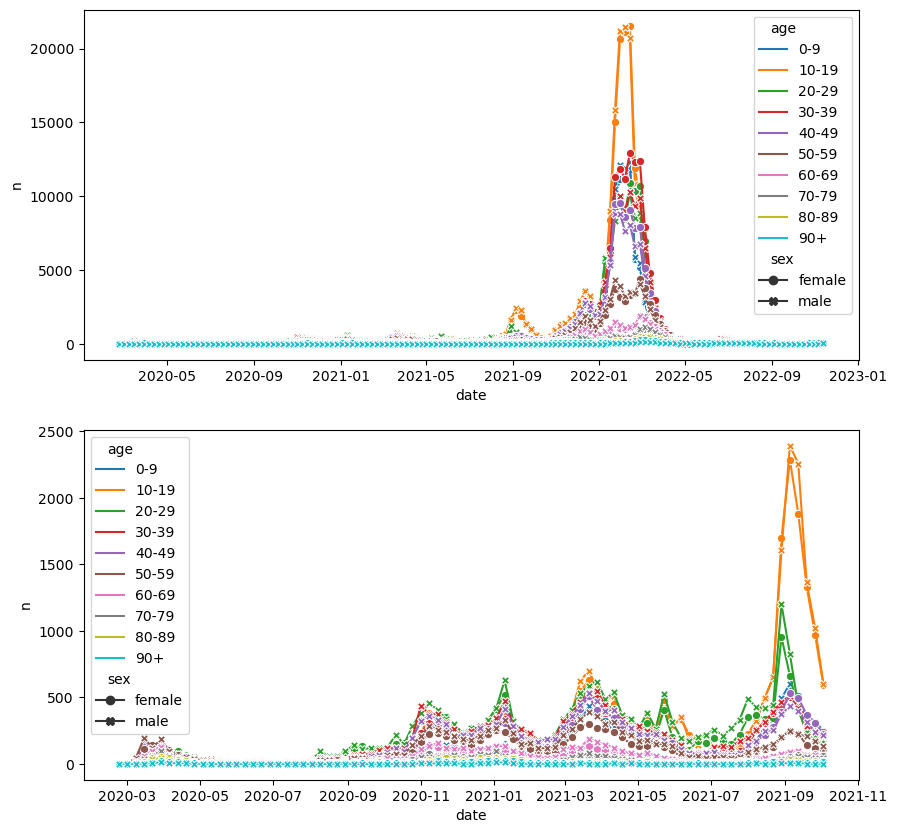

In [451]:
fig,axs=plt.subplots(2,1,figsize=(10,10))
sns.lineplot(data=msis_sexage,x=msis_sexage.date,y='n', hue='age', style='sex',markers=True, dashes=False,ax=axs[0])
sns.lineplot(data=msis_sexage[:1700],x=msis_sexage.date,y='n', hue='age', style='sex',markers=True, dashes=False,ax=axs[1])

In [452]:
lab_week=lab.set_index('date').resample('W').sum();
lab_week

/var/folders/mt/6thqwmbj5lvfz_9z7jnfcxt80000gn/T/ipykernel_16098/2569309500.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  lab_week=lab.set_index('date').resample('W').sum();


,border,year,week,x,n_neg,n_pos,pr100_pos
date,,,,,,,
2020-04-05,10100,10100,70,185.0,12840,720,27.9
2020-04-12,14140,14140,105,266.0,13377,763,40.5
2020-04-19,14140,14140,112,273.0,16104,575,25.7
2020-04-26,14140,14140,119,280.0,18650,423,16.6
2020-05-03,14140,14140,126,287.0,20634,309,12.6
...,...,...,...,...,...,...,...
2022-10-16,14140,14154,287,84.0,4732,499,69.9
2022-10-23,14140,14154,294,91.0,4703,561,79.0
2022-10-30,14140,14154,301,98.0,5033,780,98.8


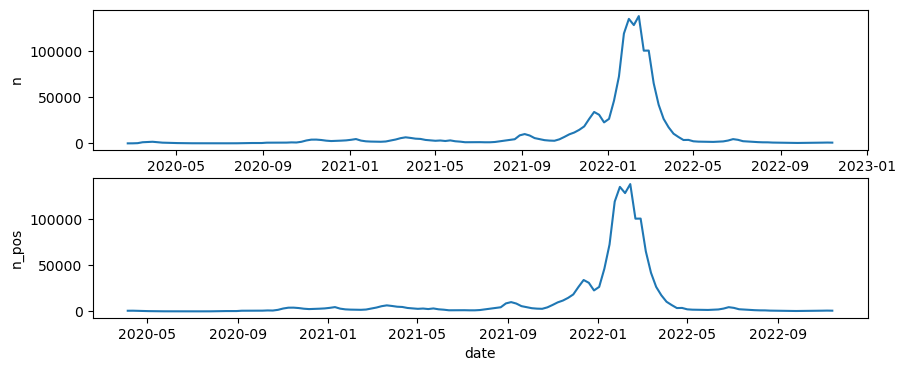

In [453]:
fig,axs=plt.subplots(2,1,figsize=(10,4))
sns.lineplot(data=msis_sexage[['date','n']].groupby('date').sum(),x='date',y='n',markers=True, dashes=False,ax=axs[0])
#axs[1]=plt.plot(pd.to_datetime(lab.date).values,lab.n_pos)
sns.lineplot(data=lab_week,x='date',y='n_pos',ax=axs[1]);


Save the total cases to a file for future references. 

In [325]:
msis_sexage.groupby('date').sum().n.to_csv('cases.csv')

/var/folders/mt/6thqwmbj5lvfz_9z7jnfcxt80000gn/T/ipykernel_16098/1744811676.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  msis_sexage.groupby('date').sum().n.to_csv('cases.csv')


### Tests


In [327]:
lab.head()

,granularity_time,granularity_geo,location_code,border,age,sex,year,week,yrwk,season,x,date,n_neg,n_pos,pr100_pos,date_of_publishing
0,day,nation,norge,2020,total,total,2020,14,2020-14,2019/2020,37.0,2020-04-01,3736,198,5.0,2022-11-14
1,day,nation,norge,2020,total,total,2020,14,2020-14,2019/2020,37.0,2020-04-02,3361,198,5.6,2022-11-14
2,day,nation,norge,2020,total,total,2020,14,2020-14,2019/2020,37.0,2020-04-03,3394,164,4.6,2022-11-14
3,day,nation,norge,2020,total,total,2020,14,2020-14,2019/2020,37.0,2020-04-04,1301,88,6.3,2022-11-14
4,day,nation,norge,2020,total,total,2020,14,2020-14,2019/2020,37.0,2020-04-05,1048,72,6.4,2022-11-14


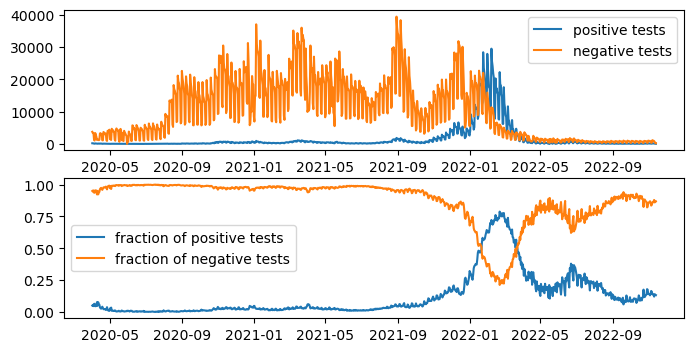

In [338]:
fig,axs=plt.subplots(2,1,figsize=(8,4))
axs[0].plot(pd.to_datetime(lab.date),lab.n_pos,pd.to_datetime(lab.date),lab.n_neg)
axs[0].legend(['positive tests','negative tests'])
axs[1].plot(pd.to_datetime(lab.date),lab.n_pos/(lab.n_pos+lab.n_neg),pd.to_datetime(lab.date),lab.n_neg/(lab.n_pos+lab.n_neg))
axs[1].legend(['fraction of positive tests','fraction of negative tests'])


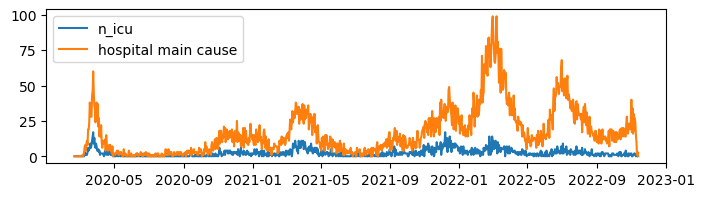

In [341]:
fig,axs=plt.subplots(1,1,figsize=(8,2))
plt.plot(pd.to_datetime(hosp.date),hosp.n_icu,pd.to_datetime(hosp.date),hosp.n_hospital_main_cause)
plt.legend(['n_icu','hospital main cause'])

## Scatter plots


<Axes: xlabel='n_pos', ylabel='n_neg'>

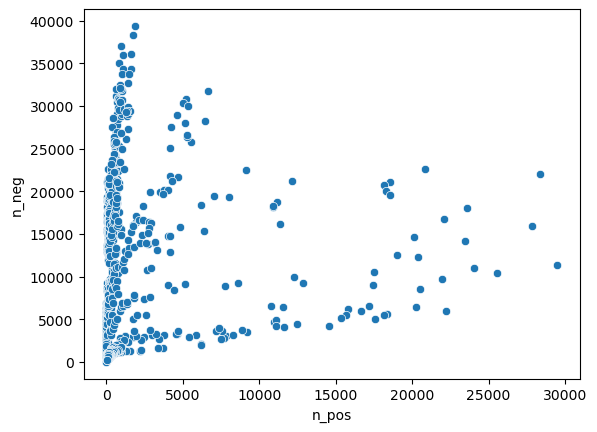

In [343]:
sns.scatterplot(data=lab,x='n_pos',y='n_neg')

## Estimate the R number

In [345]:
msis_sexage.groupby('date').sum().n

/var/folders/mt/6thqwmbj5lvfz_9z7jnfcxt80000gn/T/ipykernel_16098/2184507674.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  msis_sexage.groupby('date').sum().n


date
2020-02-23       1
2020-03-01      30
2020-03-08     217
2020-03-15    1215
2020-03-22    1438
              ... 
2022-10-16     499
2022-10-23     561
2022-10-30     780
2022-11-06     879
2022-11-13     786
Name: n, Length: 143, dtype: int64

In [438]:
import numpy as np
import pandas as pd

def estimate_R(incidence, serial_interval):
    """
    Estimate the time-varying reproduction number R_t.
    
    Parameters:
    incidence (list): List of new cases per time unit.
    serial_interval (list): List of probabilities for the serial interval distribution.
    
    Returns:
    R_t (list): Estimated reproduction number over time.
    """
    incidence = np.array(incidence)
    serial_interval = np.array(serial_interval)
    
    # Ensure the serial interval sums to 1
    serial_interval /= serial_interval.sum()
    
    # Calculate the effective reproduction number R_t
    R_t = []
    for t in range(1, len(incidence)):
        lambda_t = sum(incidence[t-i] * serial_interval[i] for i in range(1, min(t, len(serial_interval))))
        if lambda_t > 0:
            R_t.append(incidence[t] / lambda_t)
        else:
            R_t.append(np.nan)
    
    return R_t

# Example incidence data (number of new cases per day)
incidence_data = lab_hosp.n_pos.rolling(window=7).mean()

# Example serial interval distribution
serial_interval = [0.04, 0.15, 0.25, 0.25, 0.15, 0.1, 0.05,0.01]

# Estimate R_t
R_t = estimate_R(incidence_data, serial_interval)

# Convert to a pandas DataFrame for better visualization
df = pd.DataFrame({'Day': range(1, len(R_t) + 1), 'R_t': R_t, 'n': incidence_data[1:]})

df['color'] = np.where(df['R_t'] > 1, 'red', 'blue')
df


,Day,R_t,n,color
date,,,,
2020-04-02,1,NaN,NaN,blue
2020-04-03,2,NaN,NaN,blue
2020-04-04,3,NaN,NaN,blue
2020-04-05,4,NaN,NaN,blue
2020-04-06,5,NaN,NaN,blue
...,...,...,...,...
2022-11-09,952,1.060642,129.428571,red
2022-11-10,953,1.031899,126.714286,red
2022-11-11,954,0.988420,121.571429,blue


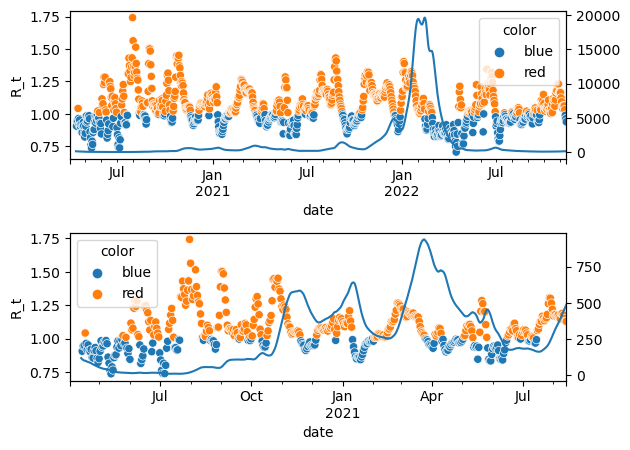

In [459]:
fig,axs=plt.subplots(2,1)

sns.scatterplot(data=df, x=df.index, y=df.R_t, hue='color', ax=axs[0])
ax2=axs[0].twinx()
df.n.rolling(window=7).mean().plot(ax=ax2)

tmp=df[:500]
sns.scatterplot(data=tmp, x=tmp.index, y=tmp.R_t, hue='color', ax=axs[1])
ax2=axs[1].twinx()
tmp.n.rolling(window=7).mean().plot(ax=ax2)
plt.subplots_adjust(hspace=0.5) 

#event_date = pd.to_datetime('2021-07-15')
#plt.axvline(event_date, color='r', linestyle='--')

# Add text to the plot
#plt.text(event_date, 250, 'Event', color='r', ha='right')

#data.cases.plot()

## Use a SIR model to estimate the R number

In [442]:

def rhs_SIR(t, y, p):
    """Right hand side of SIR model.

    All inputs are dataclasses of sympy variables, or in the case
    of non-scalar variables numpy arrays of sympy variables.
    """
    return {
        'S': - p.beta * y.I * y.S,
        'I': p.beta * y.I * y.S - p.gamma * y.I,
        #'R': p.gamma * y.I,
    }

# Assuming lab_hosp.n_pos is a pandas Series
I_data = np.array(lab_hosp.n_pos.rolling(window=7).sum()[:500].dropna().values)
times = np.linspace(0, len(I_data),len(I_data))
I_data=0.001*I_data/I_data[0]
with pm.Model() as model:
    sigma = pm.HalfCauchy('sigma', 2, shape=1)
    I_start = I_data[0] #pm.HalfNormal('I_start', sigma=5)
    S_start = 1. - I_start#
    #R_start = 0. #pm.Deterministic('R_start', 0. * S_start)
    beta = pm.Gamma('beta', mu=0.3, sigma=0.05)
    gamma =pm.Gamma('gamma', mu=0.1, sigma=0.05)
    
    
    # Compute the parameters of the ode based on our prior parameters
    R_m = pm.Deterministic('R_m', beta / gamma)
    
    y_hat, _, problem, solver, _, _ = sunode.wrappers.as_pytensor.solve_ivp(
        y0={
            'S': (S_start, ()),
            'I': (I_start, ()),
         #   'R': (R_start, ())
        },
        params={
            'beta': (beta, ()),
            'gamma': (gamma, ()),
            '_dummy': (np.array(1.), ()),
        },
        rhs=rhs_SIR,
        tvals=times,
        t0=times[0],
    )
    I_mu = pm.Deterministic('I_mu', y_hat['I'])
    sd = pm.HalfNormal('sd')
    #S_mu = pm.Deterministic('S_mu', y_hat['S'])
    #S = pm.Lognormal('S', mu=pm.math.log(y_hat['S']), sigma=sigma)
    I = pm.Normal('I', mu=I_mu, sigma=sigma,observed=I_data)
    #
    #I= pm.Normal('I', mu=I_mu, sigma=sd, observed=I_data)

    idata = pm.sample(tune=1000, draws=1000, chains=6, cores=6)


Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (6 chains in 6 jobs)
NUTS: [sigma, beta, gamma, sd]


Output()

Sampling 6 chains for 1_000 tune and 1_000 draw iterations (6_000 + 6_000 draws total) took 2165 seconds.


(0.0, 4.0)

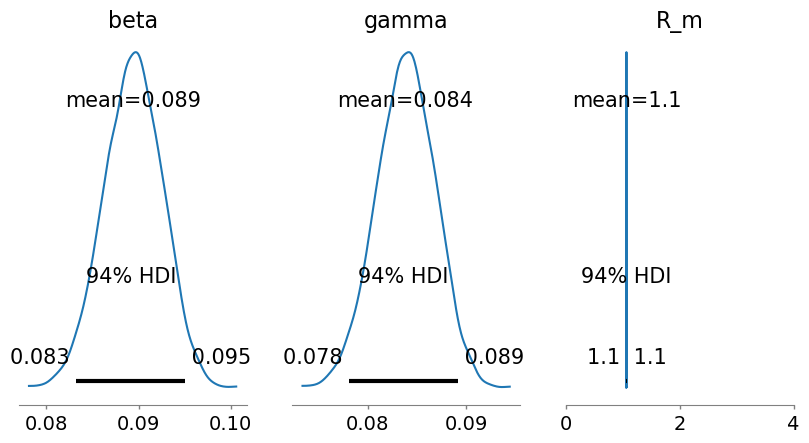

In [443]:
fig,axs = plt.subplots(1,3)
fig.set_figwidth(10)
az.plot_posterior(idata, var_names=['beta'],ax=axs[0])
az.plot_posterior(idata, var_names=['gamma'],ax=axs[1])
az.plot_posterior(idata, var_names=['R_m'],ax=axs[2])
axs[2].set_xlim(0,4)

In [226]:
idata

Inference data with groups:
	> posterior
	> sample_stats
	> observed_data

In [444]:
pm.summary(idata)

/Users/guttorm/anaconda3/envs/dyn_sys/lib/python3.11/site-packages/arviz/stats/diagnostics.py:596: RuntimeWarning: invalid value encountered in double_scalars
  (between_chain_variance / within_chain_variance + num_samples - 1) / (num_samples)


,mean,sd,hdi_3%,hdi_97%,mcse_mean,mcse_sd,ess_bulk,ess_tail,r_hat
I_mu[0],0.001,0.000,0.001,0.001,0.000,0.000,6000.0,6000.0,NaN
I_mu[1],0.001,0.000,0.001,0.001,0.000,0.000,2202.0,2748.0,1.0
I_mu[2],0.001,0.000,0.001,0.001,0.000,0.000,2203.0,3075.0,1.0
I_mu[3],0.001,0.000,0.001,0.001,0.000,0.000,2204.0,3075.0,1.0
I_mu[4],0.001,0.000,0.001,0.001,0.000,0.000,2205.0,3075.0,1.0
...,...,...,...,...,...,...,...,...,...
R_m,1.066,0.002,1.063,1.069,0.000,0.000,6036.0,4813.0,1.0
beta,0.089,0.003,0.083,0.095,0.000,0.000,1732.0,2052.0,1.0
gamma,0.084,0.003,0.078,0.089,0.000,0.000,1729.0,1997.0,1.0
sd,0.800,0.605,0.001,1.887,0.011,0.008,1949.0,1411.0,1.0


/Users/guttorm/anaconda3/envs/dyn_sys/lib/python3.11/site-packages/arviz/stats/density_utils.py:488: UserWarning: Your data appears to have a single value or no finite values
  warnings.warn("Your data appears to have a single value or no finite values")


array([[<Axes: title={'center': 'I_mu'}>,
        <Axes: title={'center': 'I_mu'}>],
       [<Axes: title={'center': 'R_m'}>, <Axes: title={'center': 'R_m'}>],
       [<Axes: title={'center': 'beta'}>,
        <Axes: title={'center': 'beta'}>],
       [<Axes: title={'center': 'gamma'}>,
        <Axes: title={'center': 'gamma'}>],
       [<Axes: title={'center': 'sd'}>, <Axes: title={'center': 'sd'}>],
       [<Axes: title={'center': 'sigma'}>,
        <Axes: title={'center': 'sigma'}>]], dtype=object)

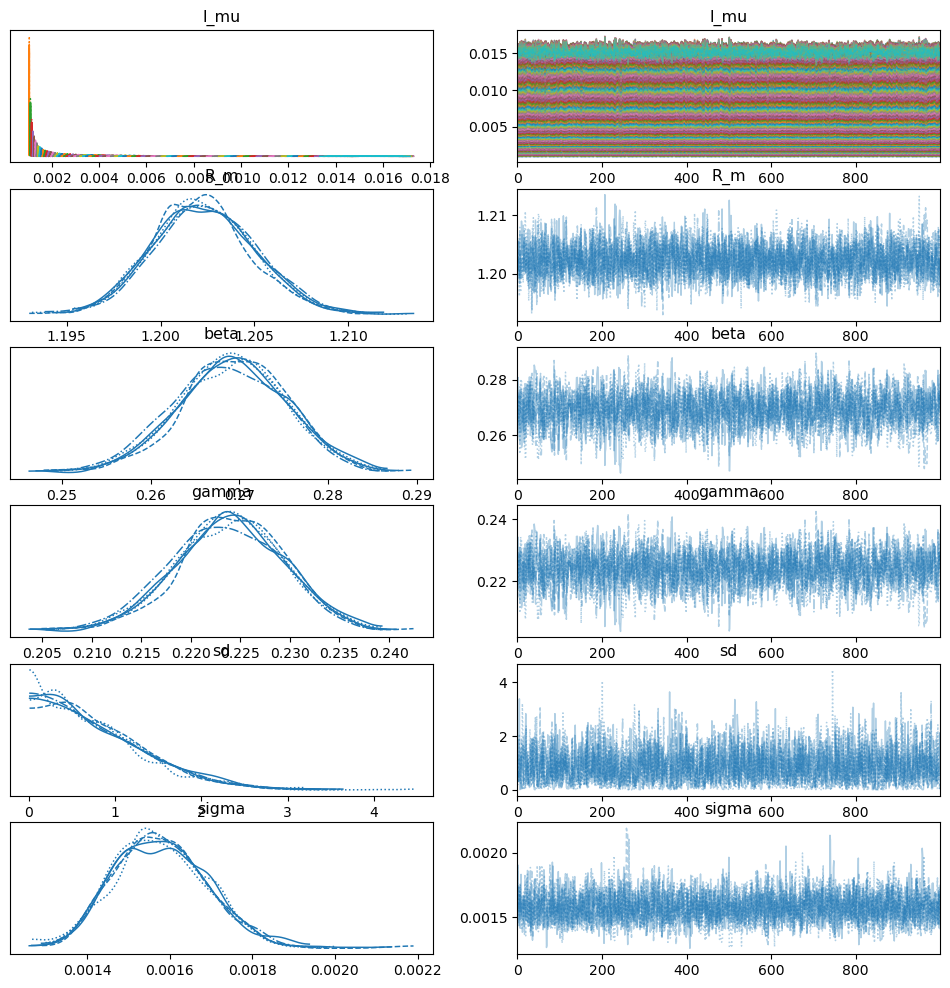

In [227]:
pm.plot_trace(idata)

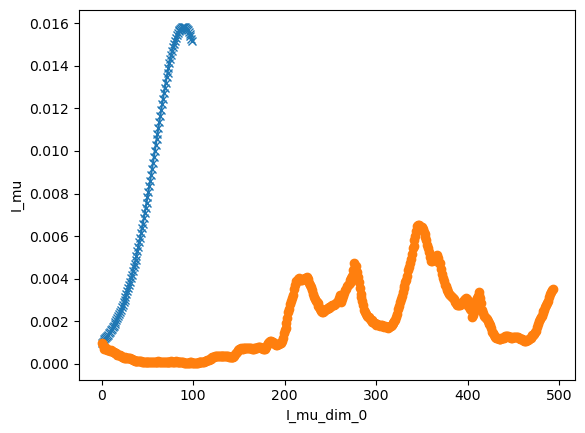

In [344]:
#idata.observed_data['I'].plot()
idata.posterior['I_mu'].mean(dim=['chain','draw']).plot(marker='x')

plt.plot(I_data,'o')

In [141]:
y_hat, _, problem, solver, _, _ = sunode.wrappers.as_pytensor.solve_ivp(
        y0={
            'S': (S_start, ()),
            'I': (I_start, ()),
            'R': (R_start, ())
        },
        params={
            'beta': (beta, ()),
            'gamma': (gamma, ()),
        },
        rhs=rhs_SIR,
        tvals=times,
        t0=times[0],
    )

In [145]:
type(y_hat['I'])

pytensor.tensor.variable.TensorVariable

In [146]:
help(y_hat['I'])

Help on TensorVariable in module pytensor.tensor.variable object:

class TensorVariable(_tensor_py_operators, pytensor.graph.basic.Variable)
 |  TensorVariable(type: ~_TensorTypeType, owner: +OptionalApplyType, index=None, name=None)
 |  
 |  Subclass to add the tensor operators to the basic `Variable` class.
 |  
 |  Method resolution order:
 |      TensorVariable
 |      _tensor_py_operators
 |      pytensor.graph.basic.Variable
 |      pytensor.graph.basic.Node
 |      pytensor.graph.utils.MetaObject
 |      typing.Generic
 |      builtins.object
 |  
 |  Methods defined here:
 |  
 |  __init__(self, type: ~_TensorTypeType, owner: +OptionalApplyType, index=None, name=None)
 |      Initialize self.  See help(type(self)) for accurate signature.
 |  
 |  ----------------------------------------------------------------------
 |  Data and other attributes defined here:
 |  
 |  __abstractmethods__ = frozenset()
 |  
 |  __annotations__ = {}
 |  
 |  __orig_bases__ = (<class 'pytensor.ten